# Librosa 輸出 Amplitude

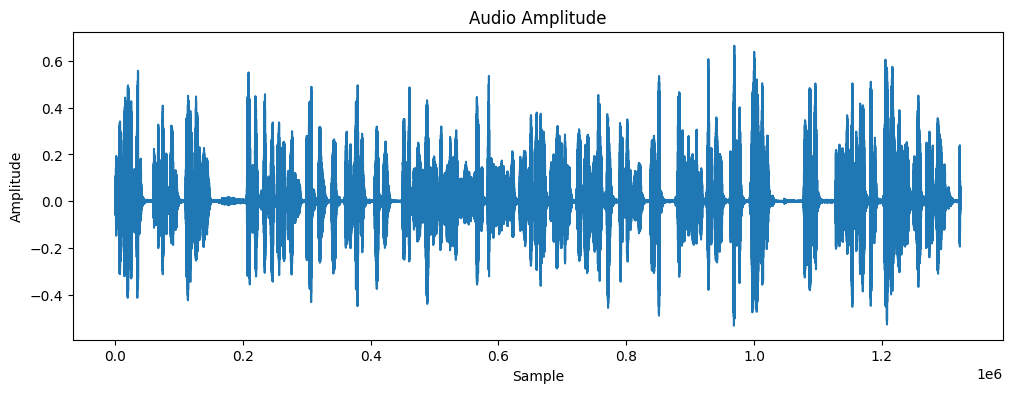

In [41]:
import librosa
import matplotlib.pyplot as plt
# 加载音频文件
audio_path = 'en_example.wav'  # 替换为您的音频文件路径
y, sr = librosa.load(audio_path)

# 绘制振幅波形
plt.figure(figsize=(12, 4))
plt.plot(y)
plt.title('Audio Amplitude')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Silero-VAD 輸出Timestamp

In [42]:
import torch
from pprint import pprint

SAMPLING_RATE = 16000
torch.set_num_threads(1)

from pprint import pprint
# download example
#torch.hub.download_url_to_file('https://models.silero.ai/vad_models/en.wav', 'en_example.wav')

USE_ONNX = False # change this to True if you want to test onnx model
  
model, utils = torch.hub.load(repo_or_dir='./snakers4_silero-vad_master',
                              source='local',
                              model='silero_vad',
                              force_reload=True,
                              onnx=USE_ONNX)

(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils



wav = read_audio('en_example.wav', sampling_rate=SAMPLING_RATE)
# get speech timestamps from full audio file
speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=SAMPLING_RATE)
pprint(speech_timestamps)

[{'end': 31200, 'start': 1568},
 {'end': 73696, 'start': 42528},
 {'end': 108512, 'start': 79392},
 {'end': 163808, 'start': 149024},
 {'end': 181728, 'start': 166944},
 {'end': 211936, 'start': 183328},
 {'end': 227808, 'start': 216608},
 {'end': 241120, 'start': 229920},
 {'end': 252896, 'start': 245280},
 {'end': 285664, 'start': 260640},
 {'end': 301024, 'start': 294432},
 {'end': 311776, 'start': 303648},
 {'end': 420320, 'start': 325664},
 {'end': 455136, 'start': 422432},
 {'end': 490976, 'start': 458784},
 {'end': 520160, 'start': 493088},
 {'end': 566752, 'start': 523808},
 {'end': 601056, 'start': 572448},
 {'end': 621024, 'start': 607264},
 {'end': 669152, 'start': 638496},
 {'end': 691680, 'start': 671776},
 {'end': 712672, 'start': 697888},
 {'end': 748512, 'start': 720928},
 {'end': 798688, 'start': 781856},
 {'end': 853984, 'start': 817696},
 {'end': 865248, 'start': 856608},
 {'end': 903648, 'start': 871968},
 {'end': 916960, 'start': 906272},
 {'end': 952288, 'start': 

# Librosa & Silero-VAD，輸出機率製作比對圖 (視覺化)

In [28]:
# 假设y是音频数据，wav是用于VAD的音频，model是VAD模型
# 首先获取语音时间戳和概率
wav = read_audio('en_example.wav', sampling_rate=SAMPLING_RATE)
speech_probs = []
window_size_samples = 512 # use 256 for 8000 Hz model
for i in range(0, len(wav), window_size_samples):
    chunk = wav[i: i+window_size_samples]
    if len(chunk) < window_size_samples:
        break
    speech_prob = model(chunk, SAMPLING_RATE).item()
    speech_probs.append(speech_prob)
model.reset_states() # reset model states after each audio

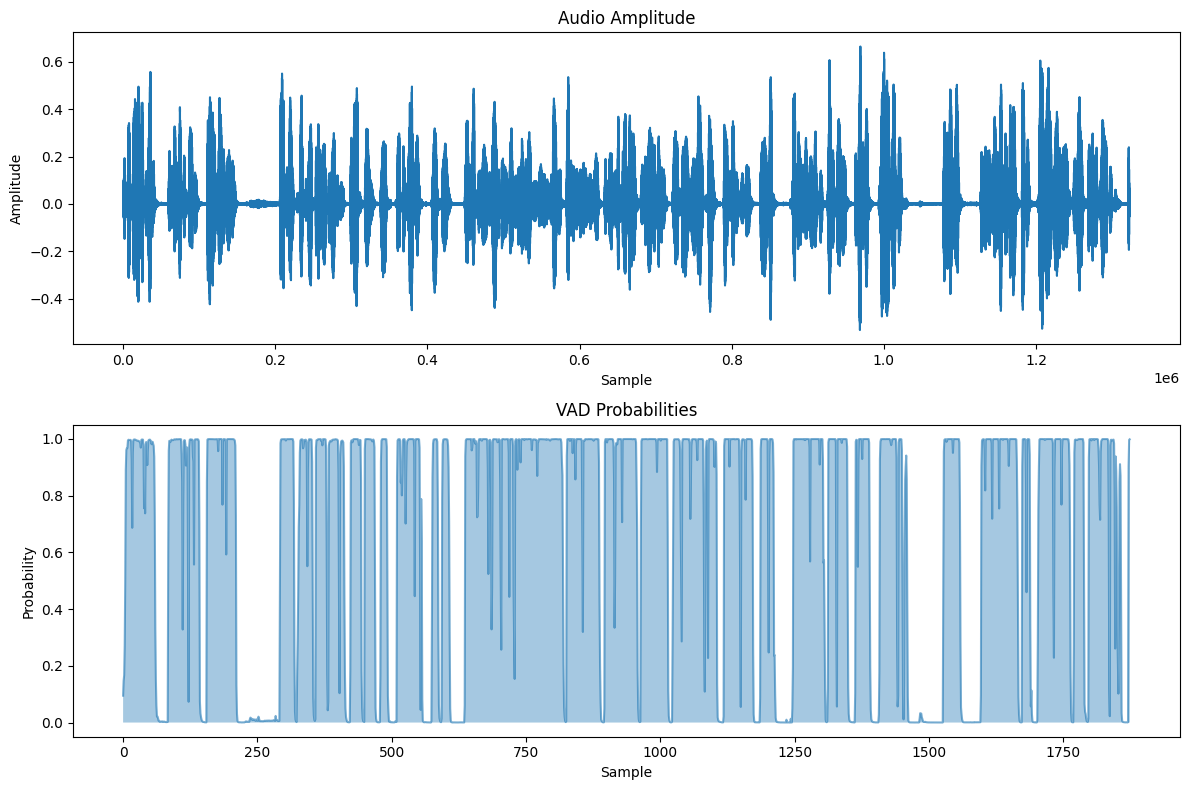

In [38]:
# 创建一个包含两个子图的图表
plt.figure(figsize=(12, 8))

# 第一个子图：音频振幅
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Audio Amplitude')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# 第二个子图：VAD概率
plt.subplot(2, 1, 2)
#plt.plot(speech_probs)
plt.fill_between(np.arange(len(speech_probs)), speech_probs, alpha=0.4)
plt.plot(speech_probs, alpha=0.6)  # 如果需要，也可以加上概率线
plt.title('VAD Probabilities')
plt.xlabel('Sample')
plt.ylabel('Probability')

# 显示图表
plt.tight_layout()
plt.show()